### Importamos las librerias

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.integrate import odeint

label_size = 16
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans', 'Tahoma']

%config InlineBackend.figure_format = 'svg' # figuras alta calidad jupyter

### Implementación del método de Odeint de Python para resolver el modelo SIR

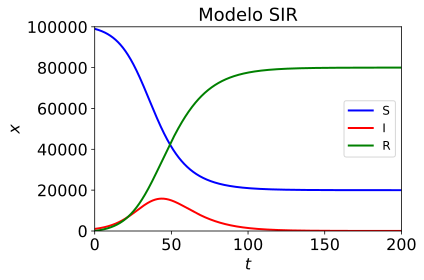

In [14]:
# Definir la función para la EDO del péndulo simple
def SIR(x, t, alpha, beta, N):
    S, I, R = x
    dxdt = [-alpha/N*I*S, alpha/N*I*S-beta*I, beta*I]
    return dxdt

# Parámetros del modelo
alpha = 0.2
beta = 0.1
N = 10**5

# Condiciones iniciales   
I0 = int(0.01*N)     
S0 = N-I0
R0 = 0
x0 = [S0, I0, R0]

# Vector de tiempo
t0 = 0
T = 200
Nt = 1000
t = np.linspace(t0, T, Nt)

# Resolvemos el modelo SIR utilizando odeint
sol = odeint(SIR, x0, t, args=(alpha, beta, N))
S = sol[:, 0] 
I = sol[:, 1]  
R = sol[:, 2]

# Graficamos las soluciones s = S/N, i = I/N, r = R/N
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(t,S, linestyle='-',linewidth=2,color='blue',label='S')
ax.plot(t,I, linestyle='-',linewidth=2,color='red',label='I')
ax.plot(t,R, linestyle='-',linewidth=2,color='green',label='R')
plt.xlabel(r"$t$",
             fontsize=16, color='black')
plt.ylabel(r"$x$",
             fontsize=16, color='black')
plt.title('Modelo SIR', fontsize=18)
plt.legend(loc='best', fontsize=12)  # Agregar leyenda
plt.xlim(min(t), max(t))
plt.ylim(0, N)
plt.show()